<a href="https://colab.research.google.com/github/Afrinnn123/Liver-Disease-Classification/blob/main/Liver_Disease_classification_for_Indian_Liver_Patient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Mount your google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



*   Import necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import math
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score




•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [ ]:
np.random.seed(123)
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project/indian_liver_patient.csv')
df = shuffle(df)
print(df)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
263   38  Female              0.8               0.2                   185   
54    42    Male              8.9               4.5                   272   
503   53    Male             19.8              10.4                   238   
192   60    Male              2.3               0.6                   272   
458   26    Male              6.8               3.2                   140   
..   ...     ...              ...               ...                   ...   
98    18    Male              0.6               0.1                   265   
322   36    Male              1.7               0.5                   205   
382   58  Female              0.7               0.1                   172   
365   40    Male              0.7               0.2                   176   
510   37  Female              0.8               0.2                   205   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [ ]:
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

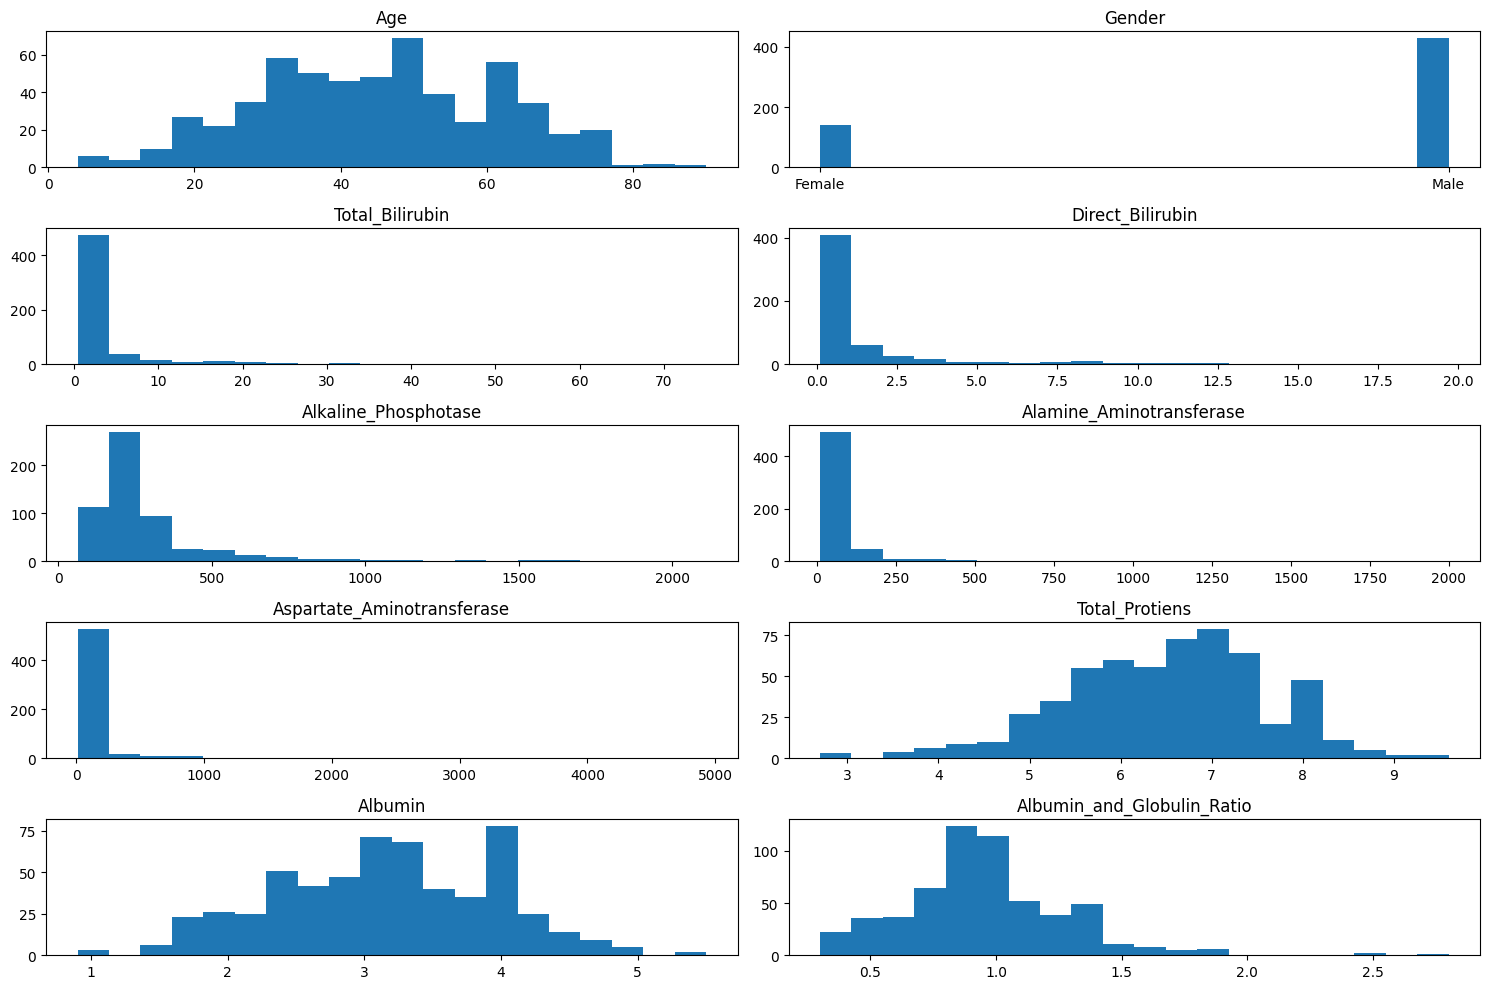

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(15, 10))
axs = axs.ravel()

for i, feature in enumerate(df.columns[:-1]):
    axs[i].hist(df[feature], bins=20)
    axs[i].set_title(feature)

plt.tight_layout()
plt.show()


•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

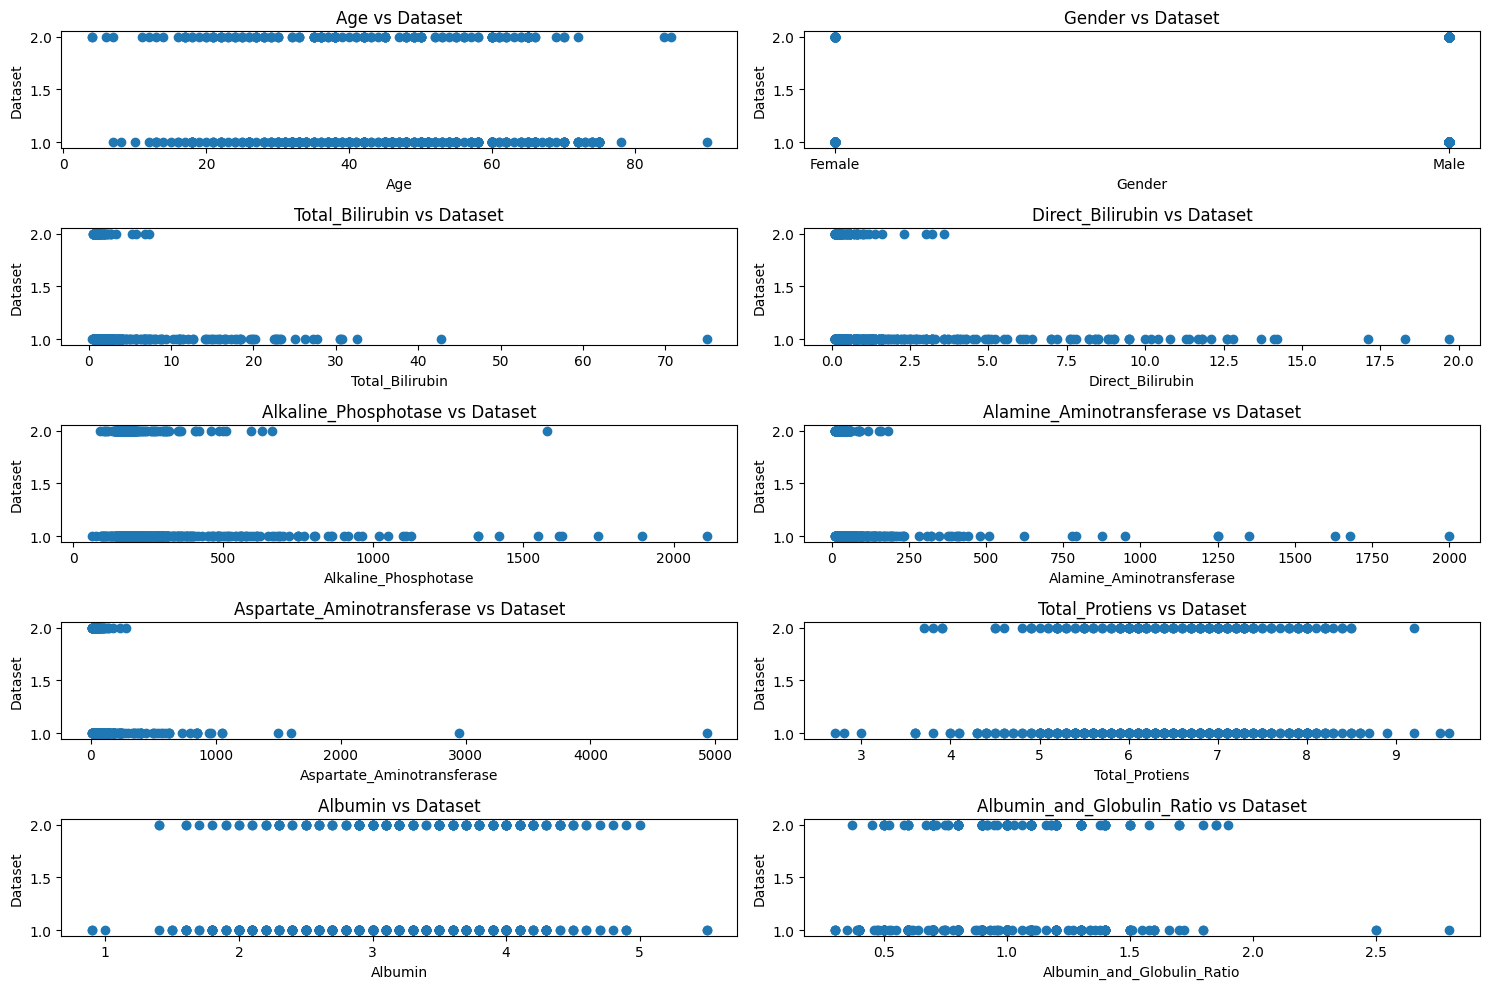

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(15, 10))
axs = axs.ravel()

target = 'Dataset'
for i, feature in enumerate(df.columns[:-1]):
    axs[i].scatter(df[feature], df[target])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel(target)
    axs[i].set_title(f"{feature} vs {target}")

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [ ]:
X = df.drop('Dataset', axis=1)
y = df['Dataset']
X_encoded = pd.get_dummies(X, columns=['Gender'])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)
print(X_scaled_df.head())

        Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  0.395349         0.005362          0.005102              0.059599   
1  0.441860         0.113941          0.224490              0.102101   
2  0.569767         0.260054          0.525510              0.085491   
3  0.651163         0.025469          0.025510              0.102101   
4  0.255814         0.085791          0.158163              0.037616   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                  0.007538                    0.002236        0.623188   
1                  0.010553                    0.010368        0.449275   
2                  0.014573                    0.042895        0.782609   
3                  0.034673                    0.008335        0.565217   
4                  0.013568                    0.001830        0.130435   

    Albumin  Albumin_and_Globulin_Ratio  Gender_Female  Gender_Male  
0  0.456522                        0.16       

•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 321 as the value of the random_state parameter of this function.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=321)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (456, 11), (456,)
Testing data shape: (114, 11), (114,)


•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

Confusion Matrix:
[[31 50]
 [ 2 31]]


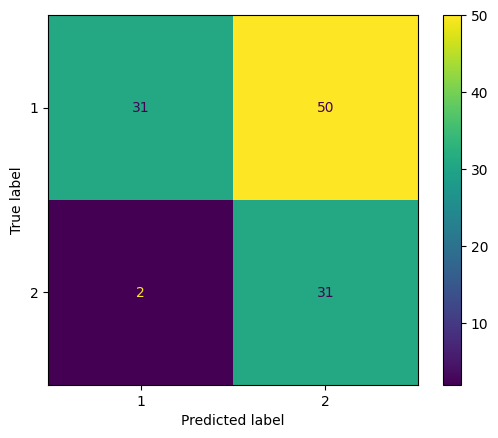


Interpretation:
True Negatives (0, 0): 31
False Positives (0, 1): 50
False Negatives (1, 0): 2
True Positives (1, 1): 31


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
cm_display.plot()
plt.show()

print("\nInterpretation:")
print("True Negatives (0, 0):", cm[0, 0])
print("False Positives (0, 1):", cm[0, 1])
print("False Negatives (1, 0):", cm[1, 0])
print("True Positives (1, 1):", cm[1, 1])


•	**Task 9:** Calculate the train and test accuracy of your model and compare them.

In [ ]:
from sklearn.metrics import accuracy_score
y_train_pred = gnb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy}")

sample_indices = [5, 20, 25, 30, 42, 50]
sample_predictions = y_pred[sample_indices]
sample_actuals = y_test.iloc[sample_indices]

print("\nSample Predictions:", sample_predictions)
print("Sample Actuals:\n", sample_actuals)


Training Accuracy: 0.5745614035087719
Testing Accuracy: 0.543859649122807

Sample Predictions: [2 2 2 2 2 1]
Sample Actuals:
 275    2
84     1
426    2
21     1
342    2
27     1
Name: Dataset, dtype: int64


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X_scaled, y, cv=10)
print("Cross-Validation Scores:")
print(scores)
mean_accuracy = scores.mean()
print(f"\nMean Accuracy: {mean_accuracy}")

Cross-Validation Scores:
[0.57894737 0.66666667 0.54385965 0.49122807 0.57894737 0.57894737
 0.54385965 0.50877193 0.50877193 0.61403509]

Mean Accuracy: 0.5614035087719298
